## Introdução

Seja $f(x)$ uma função contínua de uma variável real com período $L$. Podemos decompor $f$ em uma soma de senos e cossenos através dos seus **coeficientes de Fourier**:

$$\displaystyle f(x) = \frac{a_0}{2} + \sum_{n = 1}^{\infty} \left[ \, a_n \cos \left(\frac{2\pi k x}{L}\right) + b_n \sin\left(\frac{2\pi k x}{L}\right) \, \right] $$

onde

$$ \displaystyle
    a_n = \frac{2}{L} \int_0^L f(x) \cos \left(\frac{2\pi k x}{L}\right) \, dx, \quad
    b_n = \frac{2}{L} \int_0^L f(x) \sin \left(\frac{2\pi k x}{L}\right) \, dx \qquad \text{para } n = 0, 1, 2, 3, ...
$$

### Objetivo deste notebook

Ajudar a entender as relações acima através de visualizações.

## Inicialização do script

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ws
import scipy.integrate as integrate

PI = np.pi

def sin(x, k, phi=0): return np.sin(2*PI*(k*x + phi))

def cos(x, k, phi=0): return np.cos(2*PI*(k*x + phi))

## Calculando coeficientes

In [3]:
def plot_coefficient_integral(f, L, n, num_periods=2, show_product=True):

    fix, axs = plt.subplots(2, 1, figsize=(12, 6))

    X = np.linspace(0, num_periods*L, 500)

    ax = axs[0]
    g = lambda x: cos(x/L, n)
    h = lambda x: g(x) * f(x)

    a_n = integrate.quad(h, a=0, b=L)[0] * 2/L

    ax.plot(X, f(X), linestyle='-', label="$f(x)$")
    ax.plot(X, g(X), linestyle='--', label=f"$\cos(2\pi \, {n:d}x)$")

    if show_product:
        ax.plot(X, h(X), linestyle='-.', color='C02', label=f"$f(x)\cos(2\pi \, {n:d}x)$")
        ax.fill_between(X, 0, h(X), color='C02', alpha=0.3)

    ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
    ax.set_title(f'$a_{n:d} = ${a_n:.4f}')
    ax.grid()

    ax = axs[1]
    g = lambda x: sin(x/L, n)
    h = lambda x: g(x) * f(x)

    b_n = integrate.quad(h, a=0, b=L)[0] * 2/L

    ax.plot(X, f(X), linestyle='-', label="$f(x)$")
    ax.plot(X, g(X), linestyle='--', label=f"$\sin(2\pi \, {n:d}x)$")

    if show_product:
        ax.plot(X, h(X), linestyle='-.', color='C02', label=f"$f(x)\sin(2\pi \, {n:d}x)$")
        ax.fill_between(X, 0, h(X), color='C02', alpha=0.3)

    ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
    ax.set_title(f'$b_{n:d} = ${b_n:.4f}')
    ax.grid()

    plt.subplots_adjust(hspace=0.3)
    plt.show()

In [73]:
def plot_inner_product_integral(f, g, L, ax, f_label=None, g_label=None, title_label=None, num_periods=2):

#     f_label = f_label or "f(x)"
#     g_label = g_label or "g(x)"
    title_label = title_label or "shaded area = "
    
    X = np.linspace(0, num_periods*L, 500)

    h = lambda x: g(x) * f(x)

    a_n = integrate.quad(h, a=0, b=L)[0]  # * 2/L

    ax.plot(X, f(X), linestyle='-', label=f"${f_label}$")
    ax.plot(X, g(X), linestyle='--', label=f"${g_label}$")

    ax.plot(X, h(X), linestyle='-.', color='C02', label=f"${f_label}{g_label}$")
    ax.fill_between(X, 0, h(X), color='C02', alpha=0.3)
    ax.set_title(f'{title_label}{a_n:.4f}')
    
    if f_label is not None and g_label is not None:
        ax.legend(bbox_to_anchor=(1.02, 0.5), loc="center left", borderaxespad=0)
    
    ax.grid()

### Uma propriedade fundamental: ortogonalidade

Uma propriedade das funções seno e cosseno que é fundamental para que exista série de Fourier é a **ortogonalidade**.

Dizemos que duas funções $f, g$ definidas no intervalo $[0, L]$ são ortogonais quando
$$ \int_0^L f(x) g(x) \, dx = 0 $$

No caso das funções seno e cosseno, temos que se $m, n$ são inteiros positivos e $m \neq n$, então

$$ \int_0^L \cos \left(\frac{2\pi m x}{L}\right) \cos \left(\frac{2\pi n x}{L}\right) \, dx = 0, \quad \text{ e } \quad
\int_0^L \sin \left(\frac{2\pi m x}{L}\right) \sin \left(\frac{2\pi n x}{L}\right) \, dx = 0. $$

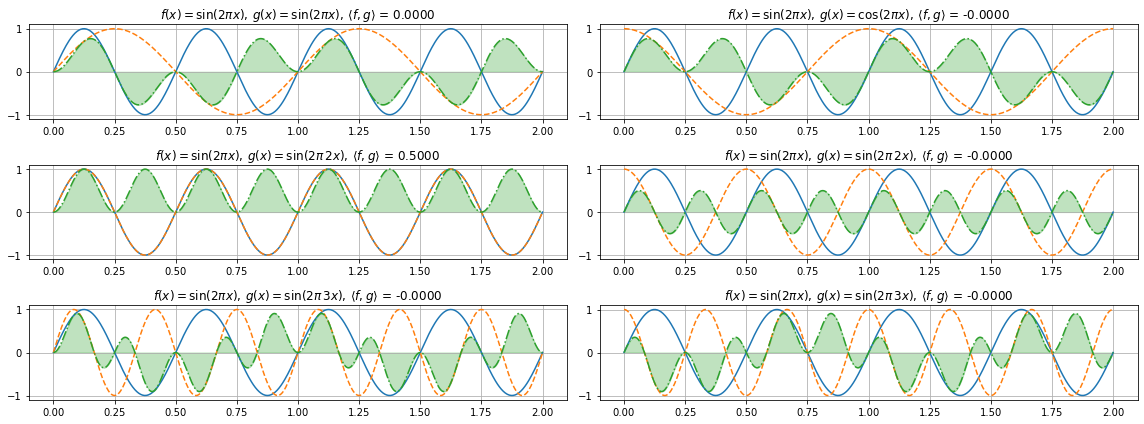

In [75]:
fix, axs = plt.subplots(3, 2, figsize=(16, 6))

_L = 1  # 2*PI
_f = lambda x: sin(x/_L, 2)

plot_inner_product_integral(_f, lambda x: sin(x/_L, 1), _L, axs[0,0], title_label=r"$f(x) = \sin(2\pi x),\, g(x) = \sin(2\pi x),\, \langle f,g\rangle $ = ")
plot_inner_product_integral(_f, lambda x: cos(x/_L, 1), _L, axs[0,1], title_label=r"$f(x) = \sin(2\pi x),\, g(x) = \cos(2\pi x),\, \langle f,g\rangle $ = ")
plot_inner_product_integral(_f, lambda x: sin(x/_L, 2), _L, axs[1,0], title_label=r"$f(x) = \sin(2\pi x),\, g(x) = \sin(2\pi \, 2x),\, \langle f,g\rangle $ = ")
plot_inner_product_integral(_f, lambda x: cos(x/_L, 2), _L, axs[1,1], title_label=r"$f(x) = \sin(2\pi x),\, g(x) = \sin(2\pi \, 2x),\, \langle f,g\rangle $ = ")
plot_inner_product_integral(_f, lambda x: sin(x/_L, 3), _L, axs[2,0], title_label=r"$f(x) = \sin(2\pi x),\, g(x) = \sin(2\pi \, 3x),\, \langle f,g\rangle $ = ")
plot_inner_product_integral(_f, lambda x: cos(x/_L, 3), _L, axs[2,1], title_label=r"$f(x) = \sin(2\pi x),\, g(x) = \sin(2\pi \, 3x),\, \langle f,g\rangle $ = ")

plt.tight_layout()
plt.show()

In [69]:
# plot_coefficient_integral(lambda x: sin(x, 1), L=1, n=1, num_periods=1)

In [70]:
# plot_coefficient_integral(lambda x: sin(x, 1), L=1, n=2, num_periods=2)

### A função $f(x)$

Começamos definindo uma função para calcular os coeficientes com período $L = 1$. A maneira mais fácil de construir uma função com um determinado período
é utilizando senos e cossenos, que é o que vamos fazer. Mais para frente vamos ver que tudo funciona da mesma maneira se a função $f(x)$ é definida de outra maneira.

$$ f(x) = \sin(2\pi x) + \frac{9}{20} \cos(6\pi x) - \frac{3}{20} \cos(6\pi x) $$

In [75]:
# f = lambda x: sin(x, 1) + 0.5*sin(x, 3, 0.3)

f = lambda x: sin(x, 1) + 0.45*cos(x, 3) - 0.15*sin(x, 3)

L = 1  # período da função f

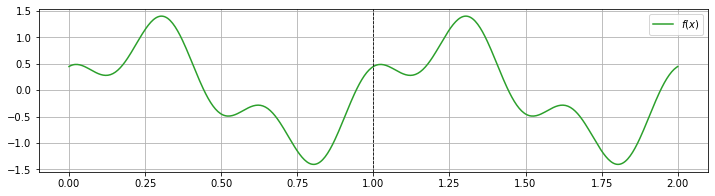

In [76]:
X = np.linspace(0, 2, 500)

fix, ax = plt.subplots(figsize=(12, 3))

ax.plot(X, f(X), linestyle='-', label=r"$f(x)$", color='C2')
ax.grid(); ax.legend()
ax.axvline(1, linestyle='--', color='k', linewidth=0.8)

plt.show()

### Coeficientes $a_1$ e $b_1$

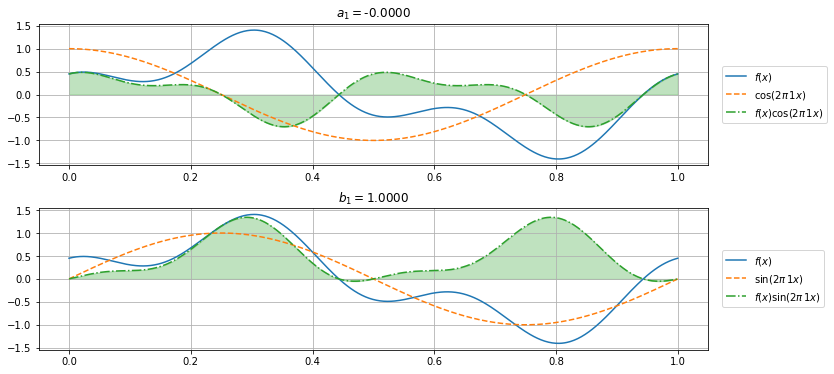

In [5]:
plot_coefficient_integral(f, L, 1, num_periods=1)

### Coeficientes $a_2$ e $b_2$

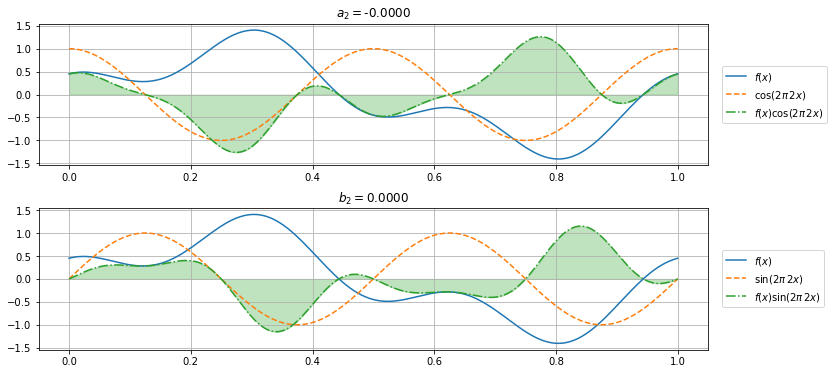

In [6]:
plot_coefficient_integral(f, L, 2, num_periods=1)

### Coeficientes $a_3$ e $b_3$

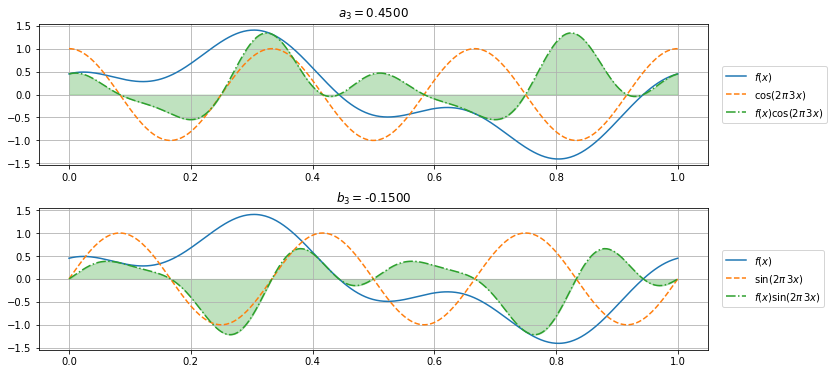

In [7]:
plot_coefficient_integral(f, L, 3, num_periods=1)

## Visualizando os coeficientes de $f(x)$

In [8]:
def fourier_coef(f, n, xi, xf):
    L = xf - xi
    a_n = integrate.quad(lambda x: f(x)*cos(x/L, n), a=xi, b=xf)[0] * 2/L
    b_n = integrate.quad(lambda x: f(x)*sin(x/L, n), a=xi, b=xf)[0] * 2/L
    return a_n, b_n

In [9]:
def stemplot_coefficients(f, L, num_coefficients=20):
    X = np.linspace(-1, 1, 500)
    N = np.arange(num_coefficients)

    FN = [fourier_coef(f, n, 0, L) for n in N]

    cos_coefs, sin_coefs  = zip(*FN)

    fig, axs = plt.subplots(3, 1, figsize=(12, 9))
    
    # Plot de f(x)
    ax = axs[0]
    ax.plot(X, f(X), '-')
    ax.set_ylabel('$f(x)$')
    ax.grid()

    # Plot dos coeficientes a_n
    ax = axs[1]
    ax.stem(N, cos_coefs, markerfmt='o', basefmt='C0')
    ax.set_ylabel('$a_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.grid()

    # Plot dos coeficientes b_n
    ax = axs[2]
    ax.stem(N, sin_coefs, markerfmt='o', basefmt='C0')
    ax.set_ylabel('$b_n$')
    ax.set_xticks(N)
    ax.set_xlim(left=-0.5)
    ax.grid()

    plt.show()

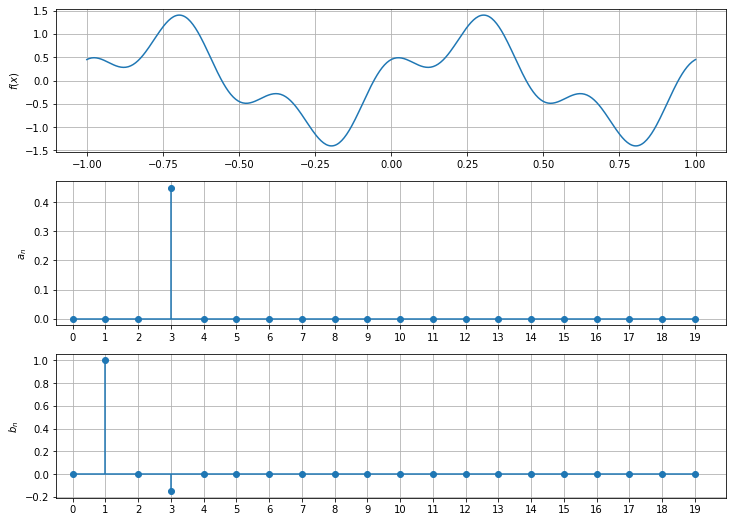

In [10]:
stemplot_coefficients(f, L=1)

## Visualizando coeficientes de outras funções

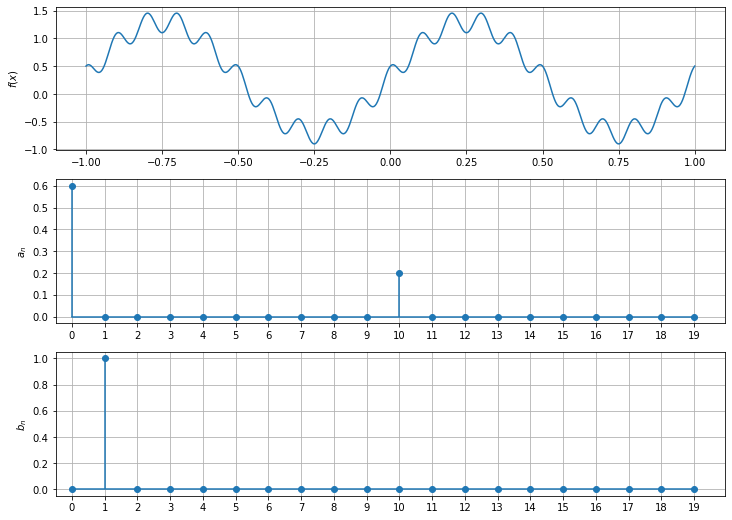

In [63]:
stemplot_coefficients(lambda x: 0.3 + sin(x, 1) + 0.2*cos(x, 10), L=1)

In [12]:
def _bump(x):
    if not (-1 < x < 1):
        return 0
    
    return np.exp(-1/(1-x**2))

bump = np.vectorize(_bump, otypes=['float'])

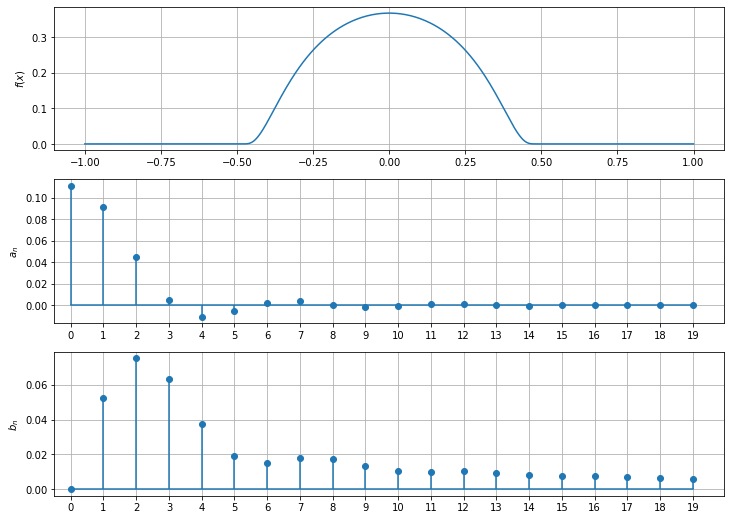

In [13]:
stemplot_coefficients(lambda x: bump(2*x), L=2)

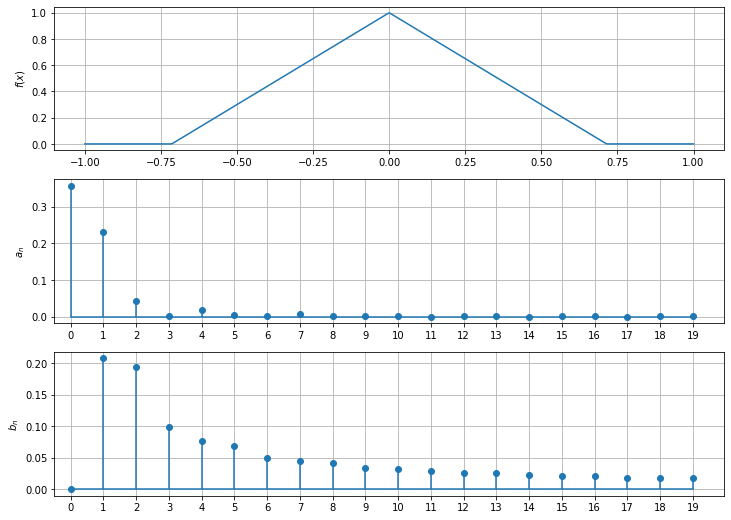

In [15]:
def _triangle(x):
    if x < -0.5 or x > 0.5:
        return 0
    elif x < 0:
        return 2*x + 1
    else:
        return -2*x + 1

triangle = np.vectorize(_triangle, otypes=['float'])

stemplot_coefficients(lambda x: triangle(0.7*x), L=2)

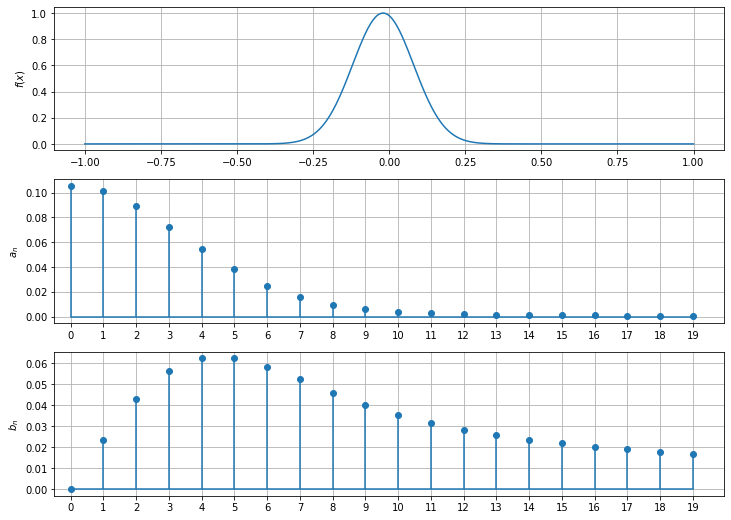

In [74]:
stemplot_coefficients(f = lambda x: np.exp(-0.5*((x+0.02)/0.1)**2), L=2)

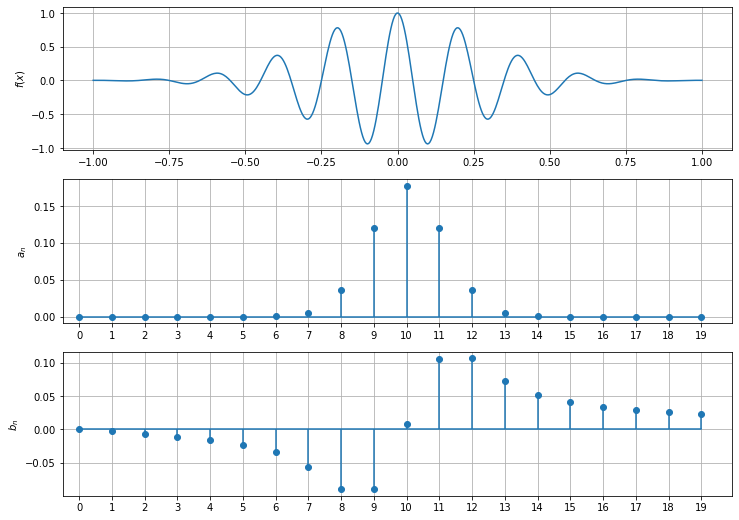

In [67]:
a = 0.4

# g = np.vectorize(lambda x: np.exp(-(x/a)**2), otypes=['float'])
# f = lambda x: cos(x, 5)
# h = lambda x: f(x) * g(x)

h = lambda x: cos(x, 5) * np.exp(-(x/a)**2)
    
stemplot_coefficients(h, L=2)